# **BANCO RECORD PYTHON**

## **Planteamiento del problema**

El banco Record ha registrado problemas en su cartera de créditos otorgados. Entonces deciden que quieren diseñar nuevas estrategias control de entrega de prestamos con un sistema de pre-evaluación soportado en Machine Learning.  


## **Objetivo**

* El objetivo principal es diseñar un modelo de Machine Learning que pueda predecir con precisión la probabilidad de incumplimiento de pago de un cliente. Para lograrlo, se utilizarán datos históricos de créditos otorgados durante los últimos tres años.

## **Principales Librerias**

In [ ]:
!pip install feature-engine

In [ ]:
!pip install catboost

In [ ]:
!pip install imblearn

In [ ]:
# Importar algunas librerias base
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from feature_engine.outliers import Winsorizer


from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn.naive_bayes import GaussianNB            # NAIVE BAYES
from sklearn.svm import SVC                           # SVM-MAQUINA DE VECTOR DE SOPORTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV


import pickle


from dataclasses import dataclass
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

## **Lectura y exploración**

In [ ]:
df = pd.read_excel('./Caso de Creditos Banco RECORD.xls')
df.head()

,ID,Mto_credito,Genero,Educacion,EstadiCivil,Edad,PAY_0,PAY_2,PAY_3,PAY_4,...,ESTADO_CUENTA_AMT4,ESTADO_CUENTA_AMT5,ESTADO_CUENTA_AMT6,MTO_PAGO_AMT1,MTO_PAGO_AMT2,MTO_PAGO_AMT3,MTO_PAGO_AMT4,MTO_PAGO_AMT5,MTO_PAGO_AMT6,TARGET_Defaul
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  30000 non-null  int64
 1   Mto_credito         30000 non-null  int64
 2   Genero              30000 non-null  int64
 3   Educacion           30000 non-null  int64
 4   EstadiCivil         30000 non-null  int64
 5   Edad                30000 non-null  int64
 6   PAY_0               30000 non-null  int64
 7   PAY_2               30000 non-null  int64
 8   PAY_3               30000 non-null  int64
 9   PAY_4               30000 non-null  int64
 10  PAY_5               30000 non-null  int64
 11  PAY_6               30000 non-null  int64
 12  ESTADO_CUENTA_AMT1  30000 non-null  int64
 13  ESTADO_CUENTA_AMT2  30000 non-null  int64
 14  ESTADO_CUENTA_AMT3  30000 non-null  int64
 15  ESTADO_CUENTA_AMT4  30000 non-null  int64
 16  ESTADO_CUENTA_AMT5  30000 non-null  int6

## **Análisis descriptivo**

In [ ]:
# Estadistica descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Mto_credito,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
Educacion,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
EstadiCivil,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
Edad,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## **Funciones para automatizar procesos**

In [ ]:
# Eliminar columnas
columnas_a_eliminar = ['ID']
df = df.drop(columns=columnas_a_eliminar)
df.head()

,Mto_credito,Genero,Educacion,EstadiCivil,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,ESTADO_CUENTA_AMT4,ESTADO_CUENTA_AMT5,ESTADO_CUENTA_AMT6,MTO_PAGO_AMT1,MTO_PAGO_AMT2,MTO_PAGO_AMT3,MTO_PAGO_AMT4,MTO_PAGO_AMT5,MTO_PAGO_AMT6,TARGET_Defaul
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
def plot_bar_charts(df, categorical_cols):
    """
    Función para graficar múltiples diagramas de barras para columnas categóricas de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    categorical_cols (list): Una lista de nombres de columnas categóricas a graficar.
    """
    num_cols = len(categorical_cols)
    fig, axes = plt.subplots(nrows=int(num_cols / 3) + (num_cols % 3 > 0), ncols=3, figsize=(18, 6 * (int(num_cols / 3) + (num_cols % 3 > 0))))

    for i, col in enumerate(categorical_cols):
        row = i // 3
        col_idx = i % 3
        sns.countplot(x=col, data=df, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f"Diagrama de barras para {col}")
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel("Recuento")
        axes[row, col_idx].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_histograms(df, numeric_cols):
    """
    Función para graficar múltiples histogramas para columnas numéricas de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    numeric_cols (list): Una lista de nombres de columnas numéricas a graficar.
    """
    num_cols = len(numeric_cols)
    fig, axes = plt.subplots(nrows=int(num_cols / 3) + (num_cols % 3 > 0), ncols=3, figsize=(18, 6 * (int(num_cols / 3) + (num_cols % 3 > 0))))

    for i, col in enumerate(numeric_cols):
        row = i // 3
        col_idx = i % 3
        sns.histplot(data=df, x=col, kde=True, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f"Histograma para {col}")
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

In [ ]:
# prompt: obtener las columas categoricas y en otra variable obtener las columnas numericas del dataframe df
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


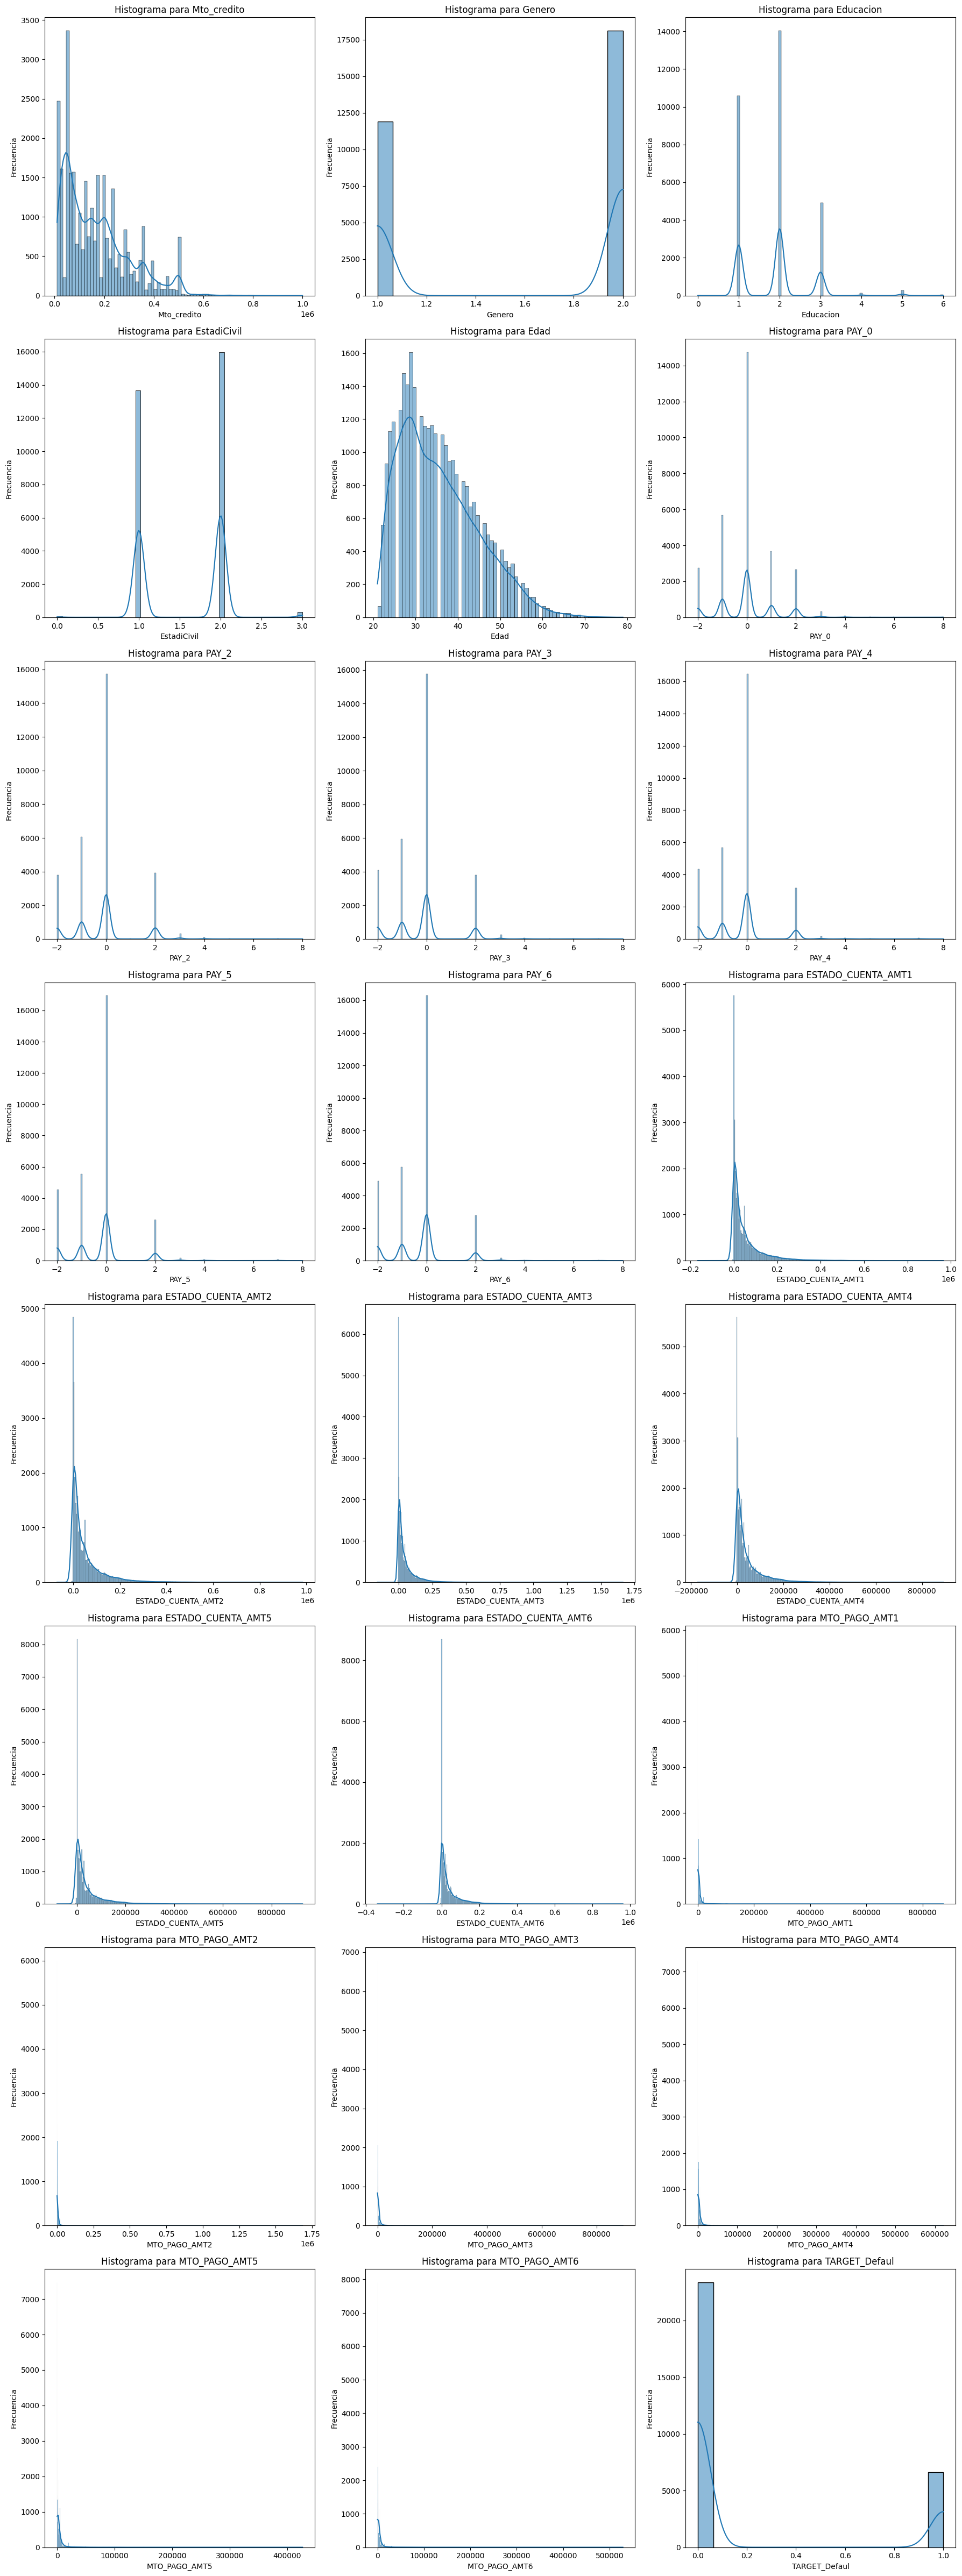

In [ ]:
plot_histograms(df, numeric_cols)

## **Manejo de outliers**

<Axes: >

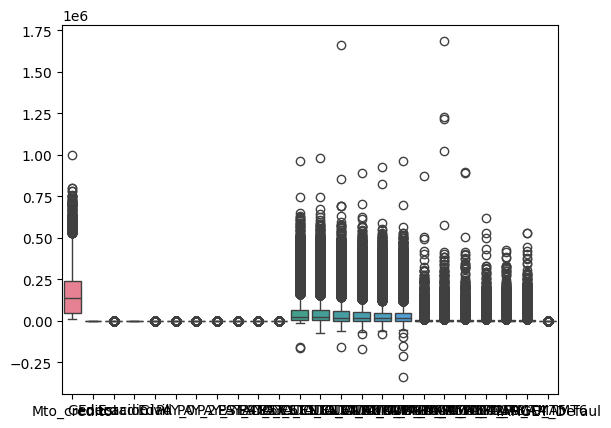

In [ ]:
sns.boxplot(df)

In [ ]:
# Create a sample array
array_col = np.array(numeric_cols)

# Find the index of the element you want to remove
index = np.where(array_col == 'TARGET_Defaul')[0][0]

# Delete the element at the specified index
columns = np.delete(array_col, index)

# Print the new array
print(columns)

['Mto_credito' 'Genero' 'Educacion' 'EstadiCivil' 'Edad' 'PAY_0' 'PAY_2'
 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6' 'ESTADO_CUENTA_AMT1' 'ESTADO_CUENTA_AMT2'
 'ESTADO_CUENTA_AMT3' 'ESTADO_CUENTA_AMT4' 'ESTADO_CUENTA_AMT5'
 'ESTADO_CUENTA_AMT6' 'MTO_PAGO_AMT1' 'MTO_PAGO_AMT2' 'MTO_PAGO_AMT3'
 'MTO_PAGO_AMT4' 'MTO_PAGO_AMT5' 'MTO_PAGO_AMT6']


In [ ]:
# TRATAMIENTO DE OUTLIERS
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=list(columns)) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo
windsoriser.fit(df)
# transformar en base a los datos entrenados
data_cleaned = windsoriser.transform(df)


In [ ]:
data_cleaned = pd.DataFrame(data_cleaned)
data_cleaned.head()

,Mto_credito,Genero,Educacion,EstadiCivil,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,ESTADO_CUENTA_AMT4,ESTADO_CUENTA_AMT5,ESTADO_CUENTA_AMT6,MTO_PAGO_AMT1,MTO_PAGO_AMT2,MTO_PAGO_AMT3,MTO_PAGO_AMT4,MTO_PAGO_AMT5,MTO_PAGO_AMT6,TARGET_Defaul
0,20000,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0,1
1,120000,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0,1
2,90000,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0,0
3,50000,2,2.0,1,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0,0
4,50000,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0,0


<Axes: >

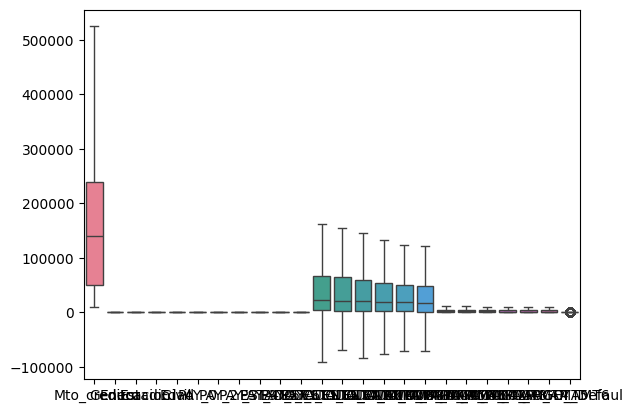

In [ ]:
sns.boxplot(data_cleaned)

## **Creación de variables dummy y nuevas variables**

In [ ]:
# Codificar variables categóricas como variables dummy
data_encoded = pd.get_dummies(data_cleaned, columns=["sex", "cp", "restecg", "slope", "thal"])

# Generar nuevas variables si es necesario
data_encoded["age_squared"] = data_encoded["age"] ** 2

## **Gráficos bivariados para cada una de las variables finales con el target**

In [ ]:
sns.boxplot(x="target", y="chol", data=data_encoded)
plt.show()

## **Pipelines**

In [ ]:
# define categorical and numerical columns
numerical_columns = []
categorical_columns = []

# Define Pipeline
# for numerical columns
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)
# for categorical columns
cat_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder()),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

# Combination of pipelines
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_columns),
        ("cat_pipelines",cat_pipeline,categorical_columns)
    ]
)

# ------------------------------------------------------------------------------------------------


# ----------------------------------------------------------------
preprocessing_obj = pickle.load('preprocessor.pkl')

# ----------------------------------------------------------------
#logging.info(f"Applying preprocessing object on training and testing dataframe")
input_feature_train_arr = preprocessing_obj.fit_transform(input_feature_train_df)
input_feature_test_arr = preprocessing_obj.transform(input_feature_test_df)

# ----------------------------------------------------------------
'''
Concatenating the arrays input_feature_train_arr and
np.Array(target_feature_train_df), which must have
the same number of rows. The result is an array called
train_arr that has the columns of both original arrays
'''
train_arr = np.c_[
    input_feature_train_arr,
    np.array(target_feature_train_df)]

test_arr = np.c_[
    input_feature_test_arr,
    np.array(target_feature_test_df)]

# ----------------------------------------------------------------
# SAVE PREPROCESSOR MODEL

## **División de Muestra Train y Test**

In [ ]:
from sklearn.preprocessing import StandardScaler


# Drop the "TARGET_Defaul" column from the DataFrame
X = data_cleaned.drop("TARGET_Defaul", axis=1)

# Extract the "TARGET_Defaul" column as the target variable
y = data_cleaned["TARGET_Defaul"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Balanceo(under, over sampling o smote)**

In [ ]:
# Evaluar si hay desequilibrio de clases en la variable objetivo
print(y_train.value_counts())

TARGET_Defaul
0    18677
1     5323
Name: count, dtype: int64


In [ ]:

# Aplicar técnicas de balanceo si es necesario (por ejemplo, SMOTE)
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
# print(y_train_balanced.value_counts())

## **Probar distintos modelos de clasificación binaria**

In [ ]:
# Inicializa los modelos de clasificación
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
}

In [ ]:
# Función para entrenar los modelos
def fit_models(models, X_train, y_train):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

trained_models = fit_models(models, X_train, y_train)

## **Indicadores de poder predictivo**

In [ ]:
from sklearn.metrics import classification_report

def evaluate_models(models, X_test, y_test):
  """
  Evaluates a dictionary of models on a given dataset.

  Args:
    models: A dictionary where keys are model names and values are model objects.

  Returns:
    None. Prints the classification report for each model.
  """
  for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")

evaluate_models(trained_models, X_test, y_test)

In [ ]:
def eval_models(trained_models, X_test, y_test):
    results = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": []
    }
    for name, model in trained_models.items():
        y_pred = model.predict(X_test)
        results["Model"].append(name)
        results["Accuracy"].append(accuracy_score(y_test, y_pred))
        results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
        results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))

    results_df = pd.DataFrame(results)
    return results_df

eval_models(trained_models, X_test, y_test)

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.803000,0.778035,0.803000
1,Random Forest,0.814667,0.795214,0.814667
2,Decision Tree,0.721167,0.730656,0.721167
3,Gradient Boosting,0.821167,0.803836,0.821167
4,XGBoost Classifier,0.813333,0.794195,0.813333
5,AdaBoost Classifier,0.816000,0.797532,0.816000
6,CatBoost Classifier,0.822167,0.805170,0.822167


## **Optimización de hiperparámetros**

In [ ]:
# Hyperparameter tuning
params = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
    },
    "Random Forest": {
        'n_estimators': [8, 16,], #32, 64, 128, 256],
        'max_depth': [None, 10, 20],
    },
    "Gradient Boosting": {
        'learning_rate': [0.1, ],#0.01, 0.05],
        'n_estimators': [8, 16]#32, 64, 128, 256],
    },
    "Logistic Regression": {
        'C': [0.1]#1, 10],
    },
    "XGBoost Classifier": {
        'learning_rate': [0.1],# 0.01, 0.05],
        'n_estimators': [8, 16], #16, 32, 64, 128, 256],
    },
    "CatBoost Classifier": {
        'depth': [6],#, 8, 10],
        'learning_rate': [0.01],#, 0.05, 0.1],
        'iterations': [30]#, 50, 100],
    },
    "AdaBoost Classifier": {
        'learning_rate': [0.1, 0.01]# , 0.5],
        #'n_estimators': [8, 16, 32, 64, 128, 256],
    }
}

In [ ]:
# Función para optimizar hiperparámetros usando GridSearchCV
def optimize_hyperparameters(models, params, X_train, y_train):
    best_models = {}
    for name, model in models.items():
        param_grid = params.get(name, {})
        if param_grid:
            print(name)
            search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            search.fit(X_train, y_train)
            best_models[name] = search.best_estimator_
        else:
            model.fit(X_train, y_train)
            best_models[name] = model
    return best_models


best_models = optimize_hyperparameters(models, params, X_train, y_train)

Logistic Regression
Random Forest
Decision Tree
Gradient Boosting
XGBoost Classifier
AdaBoost Classifier
CatBoost Classifier


In [ ]:
# Evaluar los mejores modelos
results_df = eval_models(best_models, X_test, y_test)
results_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.802833,0.777791,0.802833
1,Random Forest,0.819167,0.801114,0.819167
2,Decision Tree,0.810167,0.789514,0.810167
3,Gradient Boosting,0.819833,0.803573,0.819833
4,XGBoost Classifier,0.819667,0.802650,0.819667
5,AdaBoost Classifier,0.819333,0.802223,0.819333
6,CatBoost Classifier,0.820000,0.803076,0.820000


## **Comentarios sobre el análisis**

## **Creación API Flask para consumir el modelo**